<a href="https://colab.research.google.com/github/tubes886/sustainable-farming/blob/main/Sustainable_Farming_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Notebook setup

!gdown --id 1DgOZ56YruuUmHRD7hZNJNM39mlbRGApp # sample metadata
!gdown --id 1R4Nv1SY4zn_Z3wnZuJcCHKI6yVPGGgGZ # bacteria counts lognorm


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score, mean_absolute_error

metadata = pd.read_table('sample_metadata.tsv')
metadata.index = ['farm_%i' % i for i in range(len(metadata))]

bacteria_counts_lognorm = pd.read_csv('bacteria_counts_lognorm.csv', index_col=0)

Downloading...
From: https://drive.google.com/uc?id=1DgOZ56YruuUmHRD7hZNJNM39mlbRGApp
To: /content/sample_metadata.tsv
100% 64.3k/64.3k [00:00<00:00, 23.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1R4Nv1SY4zn_Z3wnZuJcCHKI6yVPGGgGZ
To: /content/bacteria_counts_lognorm.csv
7.44MB [00:00, 64.7MB/s]


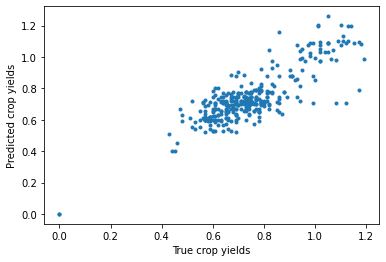

In [ ]:
# Defining X and y data
X = bacteria_counts_lognorm
y = metadata['crop_yield']

# Splitting data into testing and training
X_train_dtr, X_test_dtr, y_train_dtr, y_test_dtr = train_test_split(X, y)

# Initializing model
decision_tree_regressor = DecisionTreeRegressor(max_depth=100, max_leaf_nodes=200)
decision_tree_regressor.fit(X_train_dtr, y_train_dtr)

# Making predictions on test data
preds_dtr = decision_tree_regressor.predict(X_test_dtr)

# Plotting predictions against true crop yields of test data
plt.plot(y_test_dtr, preds_dtr, '.')
plt.xlabel('True crop yields')
plt.ylabel('Predicted crop yields')
plt.show()

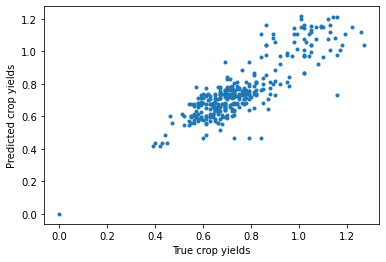

In [ ]:
# Experimenting with different models to see which type workds best in predicting crop yield from bacterial soil composition
# The code below is to see how the original DecisionTreeRegressor from earlier performed

# Defining X and y data
X = bacteria_counts_lognorm
y = metadata['crop_yield']

# Splitting data into testing and training
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Initializing model
model = DecisionTreeRegressor(max_depth=100, max_leaf_nodes=200)
model.fit(X_train, y_train)

# Making predictions on test data
preds = model.predict(X_test)

# Plotting predictions against true crop yields of test data
plt.plot(y_test, preds, '.')
plt.xlabel('True crop yields')
plt.ylabel('Predicted crop yields')
plt.show()

###**Exericse: Now go ahead and pick your favorite regression model (we have imported  ```LinearRegression```, ```MLPRegressor``` and ```KNNRegression``` for you), with your favorite hyperparameters. Go ahead and train that model, and plot test predictions against true crop yields, similarly to the cell before.**

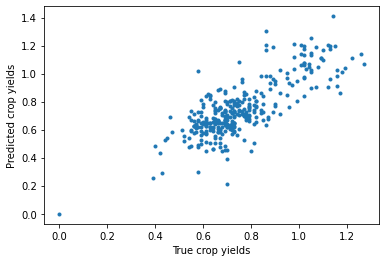

In [ ]:
# MLPRegressor, KNNRegression, Linear Regression models with favorite hyperparameters; comparing their performances to the cell before

model = LinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)

# Plot your predictions against the true crop yields of the test data
plt.plot(y_test, preds, '.')
plt.xlabel('True crop yields')
plt.ylabel('Predicted crop yields')
plt.show()


In [ ]:
# Evaluation metrics to assess model performance
# Coefficient of determination, R2
# R2 is the correlation between test predictions and true test y-values 
# R2 measures how well the variability in test predictions are explained by the variability in the true values
# The higher the R2 value, the better the model fits the data

R2 = r2_score(y_test, preds)
print('R2=', R2)

R2= 0.493955108842311


In [ ]:
# Mean absolute error, MAE
# MAE is the average error between test predictions and true y values
# Lower values are better, meaning the model is better at predictions

MAE = mean_absolute_error(y_test, preds)
print('MAE=', MAE)

MAE= 0.09332740424985062


In [ ]:
# Relative squared error, RSE
# RSE is the error in model prediction relative to predictions gotten if a very simple model was used- an average of all test data values
# The closer the RSE value to zero, the better

# Computing RSE using y_test and preds
def relative_squared_error(true_vals, pred_vals):

  # Computing the total squared error for predictions
  total_squared_error = sum((pred_vals-true_vals)**2)

  # Computing the average of true_vals.
  average_of_true_vals = np.mean(true_vals)

  # Compute the total squared error if we were using a simple model.
  total_squared_error_simple_predictor  = sum((average_of_true_vals-true_vals)**2)

  # Returning the ratio of total squared errors for model compared to the simple model
  return (total_squared_error/total_squared_error_simple_predictor)


# Using newly defined function to compute RSE using y_test and preds
RSE = relative_squared_error(y_test, preds)
print('RSE=', RSE)

RSE= 0.5060448911576889


In [ ]:
metadata

,crop_yield,sample_type,country,timestamp
farm_0,0.68,barley soil sample,GAZ:Australia,2011-3-26
farm_1,1.00,barley soil sample,GAZ:Australia,2011-11-22
farm_2,0.87,barley soil sample,GAZ:Australia,2011-6-10
farm_3,0.68,barley soil sample,GAZ:Australia,2011-11-3
farm_4,0.67,barley soil sample,GAZ:Australia,2011-3-26
...,...,...,...,...
farm_1339,0.74,barley soil sample,GAZ:Australia,2011-3-9
farm_1340,0.77,barley soil sample,GAZ:Australia,2011-9-25
farm_1341,0.69,barley soil sample,GAZ:Australia,2011-2-13
farm_1342,0.44,barley soil sample,GAZ:Australia,2011-1-2


In [ ]:
# Retrieving crop yield predictions on training data
crop_yield_test_predictions = model.predict(X_test)

# Creating new dataframe and corresponding farm numbers
yield_predictions_dataframe = pd.DataFrame(data={'farm':X_test.index, 'crop_yield':crop_yield_test_predictions})
yield_predictions_dataframe.head()

,farm,crop_yield
0,farm_335,1.029991
1,farm_1311,0.897462
2,farm_180,0.680021
3,farm_110,0.445745
4,farm_640,0.891508


In [ ]:
# Sorting predictions dataframe by crop yield, viewing first ten farms
sorted_dataframe = yield_predictions_dataframe
top_farms_dataframe = sorted_dataframe.head(10)
farm_names=top_farms_dataframe['farm']
print("According to our model, the top 10 best plots are:", farm_names.to_list())
top_farms_dataframe

According to our model, the top 10 best plots are: ['farm_335', 'farm_1311', 'farm_180', 'farm_110', 'farm_640', 'farm_974', 'farm_636', 'farm_338', 'farm_1292', 'farm_614']


,farm,crop_yield
0,farm_335,1.029991
1,farm_1311,0.897462
2,farm_180,0.680021
3,farm_110,0.445745
4,farm_640,0.891508
5,farm_974,0.462010
6,farm_636,0.503956
7,farm_338,0.615389
8,farm_1292,1.171882
9,farm_614,0.631764


In [ ]:
# If gov had gone with model's suggestions, what would have been total crop yield of the ten farms?
# Extracting true crop yields from the 10 farms the model suggested
crop_yields_top_10_predictions = top_farms_dataframe['crop_yield']


# Computing total crop yield from all 10 farms combined
total_crop_yield_using_model = crop_yields_top_10_predictions.sum()
print("total crop yield using model suggestions: ", total_crop_yield_using_model)

total crop yield using model suggestions:  7.329726851491463


In [ ]:
# Simulating the government picking plots for farm via lottery rather than using our model

np.random.seed(100) 

# Randomly pick ten farms/crop yields from test data
crop_yields_10_random_picks = np.random.choice(y_test, 10)

# Computing total crop yield from all ten randomly chosen farms combined
total_crop_yield_using_lottery = crop_yields_10_random_picks.sum()
print("Total crop yield using random picks: ", total_crop_yield_using_lottery)

Total crop yield using random picks:  8.15


In [ ]:
# Changing the random.seed in above code simulates a different set of randomly chosen farms each time, so we want to run it many times for accuracy
# Computing total crop yield for 100 interations of the simulation

# Randomly pick 10 farms/crop yields from test data
total_crop_yield_using_lottery_list = np.array([])
for simulation in range(100):

  crop_yields_10_random_picks = np.random.choice(y_test, 10)
  total_crop_yield_using_lottery = crop_yields_10_random_picks.sum()

  # Appending value to list of total crop yields
  total_crop_yield_using_lottery_list = np.append(total_crop_yield_using_lottery_list, total_crop_yield_using_lottery)

print('lottery crop yields: ', total_crop_yield_using_lottery_list)

lottery crop yields:  [7.77 8.28 7.97 7.57 8.26 7.91 7.69 7.24 7.54 6.79 7.03 7.18 7.91 7.78
 7.56 7.57 7.21 7.4  8.6  7.98 8.12 7.21 7.77 7.35 7.41 7.87 7.63 7.48
 7.69 7.24 7.29 7.93 7.25 6.77 7.23 7.89 6.68 7.56 8.08 7.69 7.08 8.05
 6.79 7.35 7.28 7.71 7.11 8.12 7.31 8.34 6.69 8.23 7.26 8.44 7.3  7.4
 7.41 7.69 8.67 8.16 6.89 6.73 7.58 8.07 7.33 7.63 7.15 7.98 7.01 8.99
 6.87 8.44 8.03 7.49 6.87 6.86 7.61 7.7  7.94 7.86 8.69 6.89 6.84 7.1
 8.21 7.36 7.61 8.44 7.04 7.42 7.11 8.03 7.27 8.19 7.27 6.16 7.61 6.5
 7.02 7.63]


In [ ]:
# Average crop yield if government chose farms based on lottery

avg_total_crop_yield_from_lottery = np.mean(total_crop_yield_using_lottery_list)
print("average crop yield using lottery system:", avg_total_crop_yield_from_lottery)

average crop yield using lottery system: 7.551900000000001


Dotted line represents total crop yield if using model to select farms.


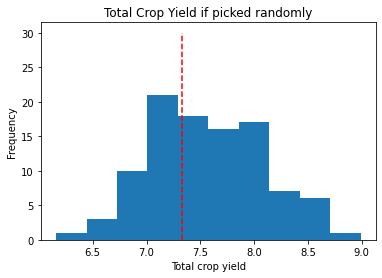

In [ ]:
# Histogram of crop yields using lottery system compared to crop yields using our model

plt.hist(total_crop_yield_using_lottery_list)
plt.vlines(total_crop_yield_using_model, ymin=0, ymax=30, color='r', linestyle='dashed')
plt.xlabel('Total crop yield')
plt.ylabel('Frequency')
plt.title('Total Crop Yield if picked randomly')
print('Dotted line represents total crop yield if using model to select farms.')